# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [1]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
a1 = a[3:]
print(a1)
# reverse the list
print(a1.reverse())
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a2 = [i**2 for i in a]
print(a2)

[4, 5, 6]
None
[1, 4, 9, 16, 25, 36]


In [2]:
import numpy as np
# create a numpy array from this list
b = np.array(a) # change this
b

array([1, 2, 3, 4, 5, 6])

In [3]:
# find the mean of b
m = np.mean(b)
m

3.5

In [4]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
c = np.square(b)
c

array([ 1,  4,  9, 16, 25, 36])

In [5]:
# change b from a length-6 list to a 2x3 matrix
b = np.reshape(b, (2,3))
b

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
# find the mean value of each row
b.mean(axis = 1)

array([2., 5.])

In [7]:
# find the mean value of each column
b.mean(axis = 0)

array([2.5, 3.5, 4.5])

In [8]:
# find the third column of b
b[:,2]

array([3, 6])

In [9]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks_clean.csv')
df

,Unnamed: 0,beverage_category,beverage,beverage_prep,calories,total fat g,trans fat g,saturated fat g,sodium mg,total carbohydrates g,cholesterol mg,dietary fibre g,sugars g,protein g,vitamin a % dv,vitamin c % dv,calcium % dv,iron % dv,caffeine mg
0,0,coffee,brewed coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,1,coffee,brewed coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,2,coffee,brewed coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,3,coffee,brewed coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,4,classic espresso drinks,caffe latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,237,frappuccino blended creme,strawberries creme without whipped cream,Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6,8,20,10,0
238,238,frappuccino blended creme,vanilla bean without whipped cream,Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6,0,10,0,0
239,239,frappuccino blended creme,vanilla bean without whipped cream,Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6,0,10,0,0
240,240,frappuccino blended creme,vanilla bean without whipped cream,Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4,0,10,6,0


In [10]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df['calories'].mean()

193.87190082644628

In [11]:
# how many different categories of beverages are there?
len(df["beverage_category"].unique())

9

In [12]:
# what is the average # calories for each beverage category?
df.groupby(["beverage_category"]).mean()['calories']

beverage_category
classic espresso drinks             140.172414
coffee                                4.250000
frappuccino blended coffee          276.944444
frappuccino blended creme           233.076923
frappuccino light blended coffee    162.500000
shaken iced beverages               114.444444
signature espresso drinks           250.000000
smoothies                           282.222222
tazo tea drinks                     177.307692
Name: calories, dtype: float64

In [13]:
# what beverage preparation includes the most sugar on average?
df.groupby(["beverage_category"]).max()['sugars g']

beverage_category
classic espresso drinks             45
coffee                               0
frappuccino blended coffee          84
frappuccino blended creme           69
frappuccino light blended coffee    52
shaken iced beverages               49
signature espresso drinks           83
smoothies                           41
tazo tea drinks                     71
Name: sugars g, dtype: int64

In [14]:
# what is the average % daily value calcium content for each beverage?
df.groupby(["beverage_category"]).mean()['calcium % dv']

beverage_category
classic espresso drinks             27.344828
coffee                               0.500000
frappuccino blended coffee          12.277778
frappuccino blended creme           13.846154
frappuccino light blended coffee    11.333333
shaken iced beverages                4.000000
signature espresso drinks           31.375000
smoothies                           13.333333
tazo tea drinks                     23.653846
Name: calcium % dv, dtype: float64

In [15]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
ma = max(df["protein g"])
df[ma == df["protein g"]].min()['calories']

280

<AxesSubplot:ylabel='Frequency'>

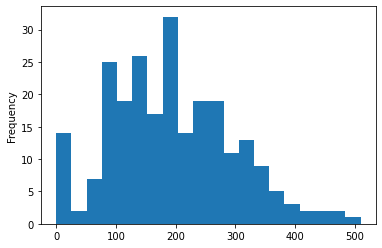

In [16]:
# plot the distribution of the number of calories in drinks using matplotlib

import matplotlib.pyplot as plt

df["calories"].plot.hist(bins = 20)

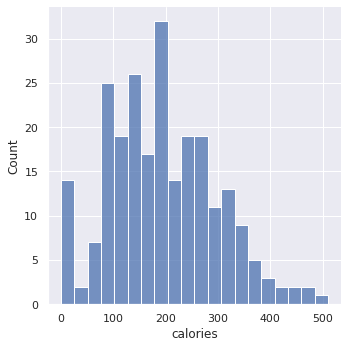

In [17]:
# plot the same distribution using seaborn. what about a density plot instead?

import seaborn as sns

sns.set()
sns.displot(data=df, x="calories", bins=20)

<AxesSubplot:xlabel='total fat g', ylabel='calories'>

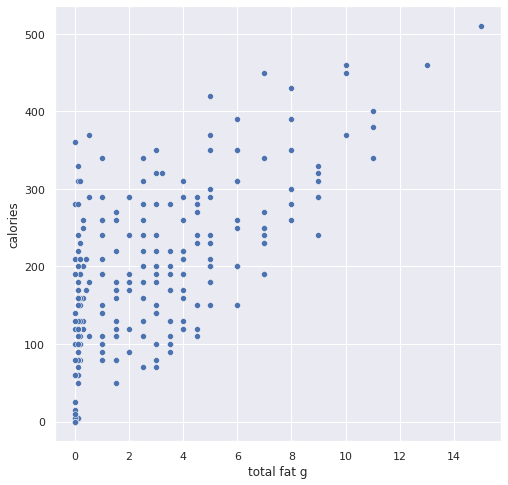

In [18]:
# plot calories against total fat using seaborn
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x="total fat g", y="calories")

<Figure size 576x576 with 0 Axes>

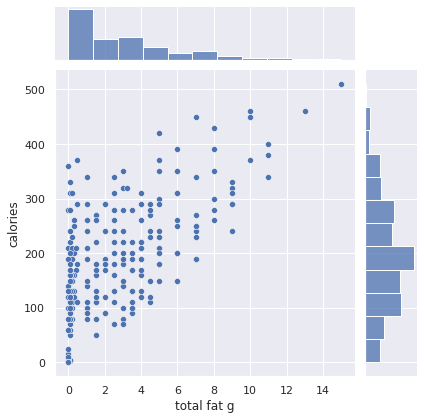

In [19]:
plt.figure(figsize=(8, 8))
sns.jointplot(data=df, x="total fat g", y="calories")

array([[<AxesSubplot:title={'center':'2% Milk'}>,
        <AxesSubplot:title={'center':'Doppio'}>,
        <AxesSubplot:title={'center':'Grande'}>,
        <AxesSubplot:title={'center':'Grande Nonfat Milk'}>],
       [<AxesSubplot:title={'center':'Short'}>,
        <AxesSubplot:title={'center':'Short Nonfat Milk'}>,
        <AxesSubplot:title={'center':'Solo'}>,
        <AxesSubplot:title={'center':'Soymilk'}>],
       [<AxesSubplot:title={'center':'Tall'}>,
        <AxesSubplot:title={'center':'Tall Nonfat Milk'}>,
        <AxesSubplot:title={'center':'Venti'}>,
        <AxesSubplot:title={'center':'Venti Nonfat Milk'}>],
       [<AxesSubplot:title={'center':'Whole Milk'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

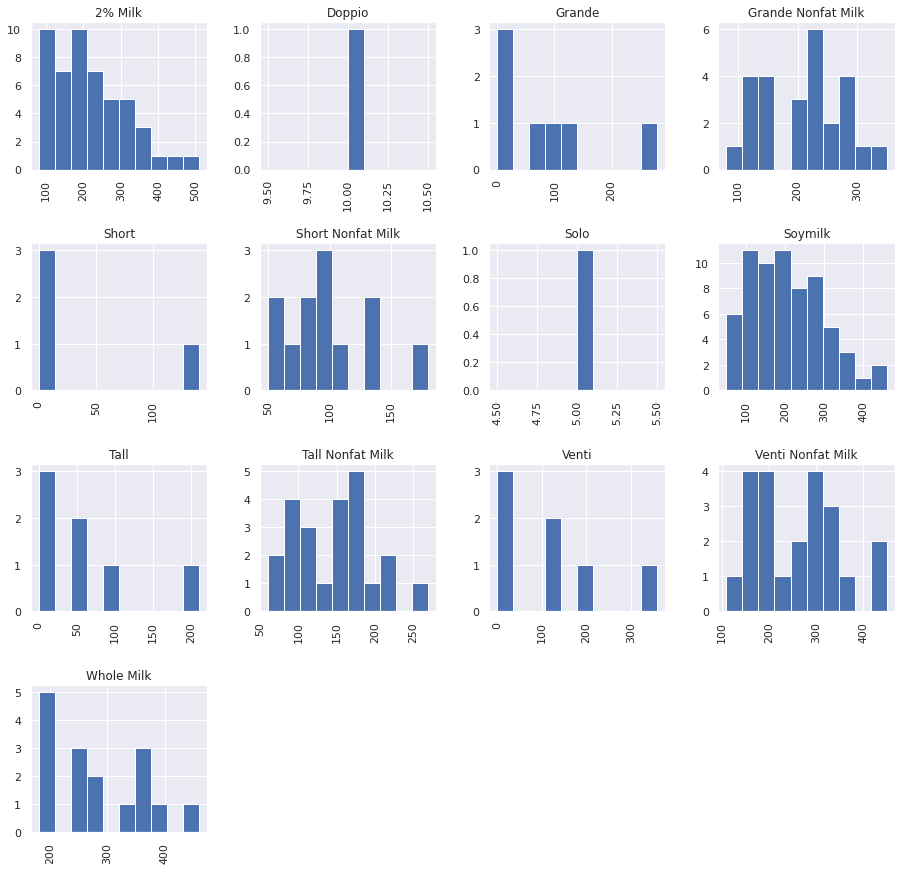

In [20]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.

df["calories"].hist(by=df["beverage_prep"], figsize=(15, 15))
